<a href="https://colab.research.google.com/github/fabiodemo/Yolov8/blob/master/aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Wed Aug 30 14:10:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f9102a9b92c5088552a099bbebf3343b89b2eda60a147671c2ecf6bf740d93dd
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=665b43c659f378b80ac80d00be0608b2a753aca542cca088326801c9da3cc2b7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key="IY7ESBtovhbLtT6jYb04")
project = rf.workspace("moinfaisal").project("potholes-detection-yolonas")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to potholes-detection-yolonas-5 in yolov5pytorch:: 100%|██████████| 3172/3172 [00:01<00:00, 2671.70it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [18]:
%cd {HOME}

/content


In [19]:
%cd {dataset.location}

/content/datasets/potholes-detection-yolonas-5


In [20]:
%
!yolo taskcd {HOME}
=detect mode=train model=yolov8m.pt data=/content/datasets/potholes-detection-yolonas-5/data.yaml epochs=70 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 55.6MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/potholes-detection-yolonas-5/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0

In [21]:
!ls {HOME}//runs/detect/train

args.yaml					    results.csv
events.out.tfevents.1693404982.9ab168f941b4.1830.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
P_curve.png					    train_batch2.jpg
PR_curve.png					    weights
R_curve.png


In [23]:
!rm -rf /content/runs

In [22]:
!pip install unrar

In [24]:
!unrar x /content/runs.part1.rar  /content/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/runs.part1.rar

Creating    /content/runs                                             OK
Creating    /content/runs/detect                                      OK
Creating    /content/runs/detect/train                                OK
Extracting  /content/runs/detect/train/args.yaml                           0%  OK 
Creating    /content/runs/detect/train2                               OK
Extracting  /content/runs/detect/train2/args.yaml                          0%  OK 
Creating    /content/runs/detect/train3                               OK
Extracting  /content/runs/detect/train3/args.yaml                          0%  OK 
Creating    /content/runs/detect/train4                               OK
Extracting  /content/runs/detect/train4/args.yaml                          0%  OK 
Extracting  /content/runs/detect/train4/confusion_matrix.png             

In [25]:
!zip -r /content/backup.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.08.24/ (stored 0%)
  adding: content/.config/logs/2023.08.24/21.25.35.723493.log (deflated 56%)
  adding: content/.config/logs/2023.08.24/21.23.44.598291.log (deflated 91%)
  adding: content/.config/logs/2023.08.24/21.24.28.892496.log (deflated 58%)
  adding: content/.config/logs/2023.08.24/21.25.34.842300.log (deflated 57%)
  adding: content/.config/logs/2023.08.24/21.25.07.624486.log (deflated 58%)
  adding: content/.config/logs/2023.08.24/21.24.55.354132.log (deflated 86%)
  adding: content/.config/.last_update_check.json (deflated 23%)
 

#**Displaying the Confusion Matrix**

/content


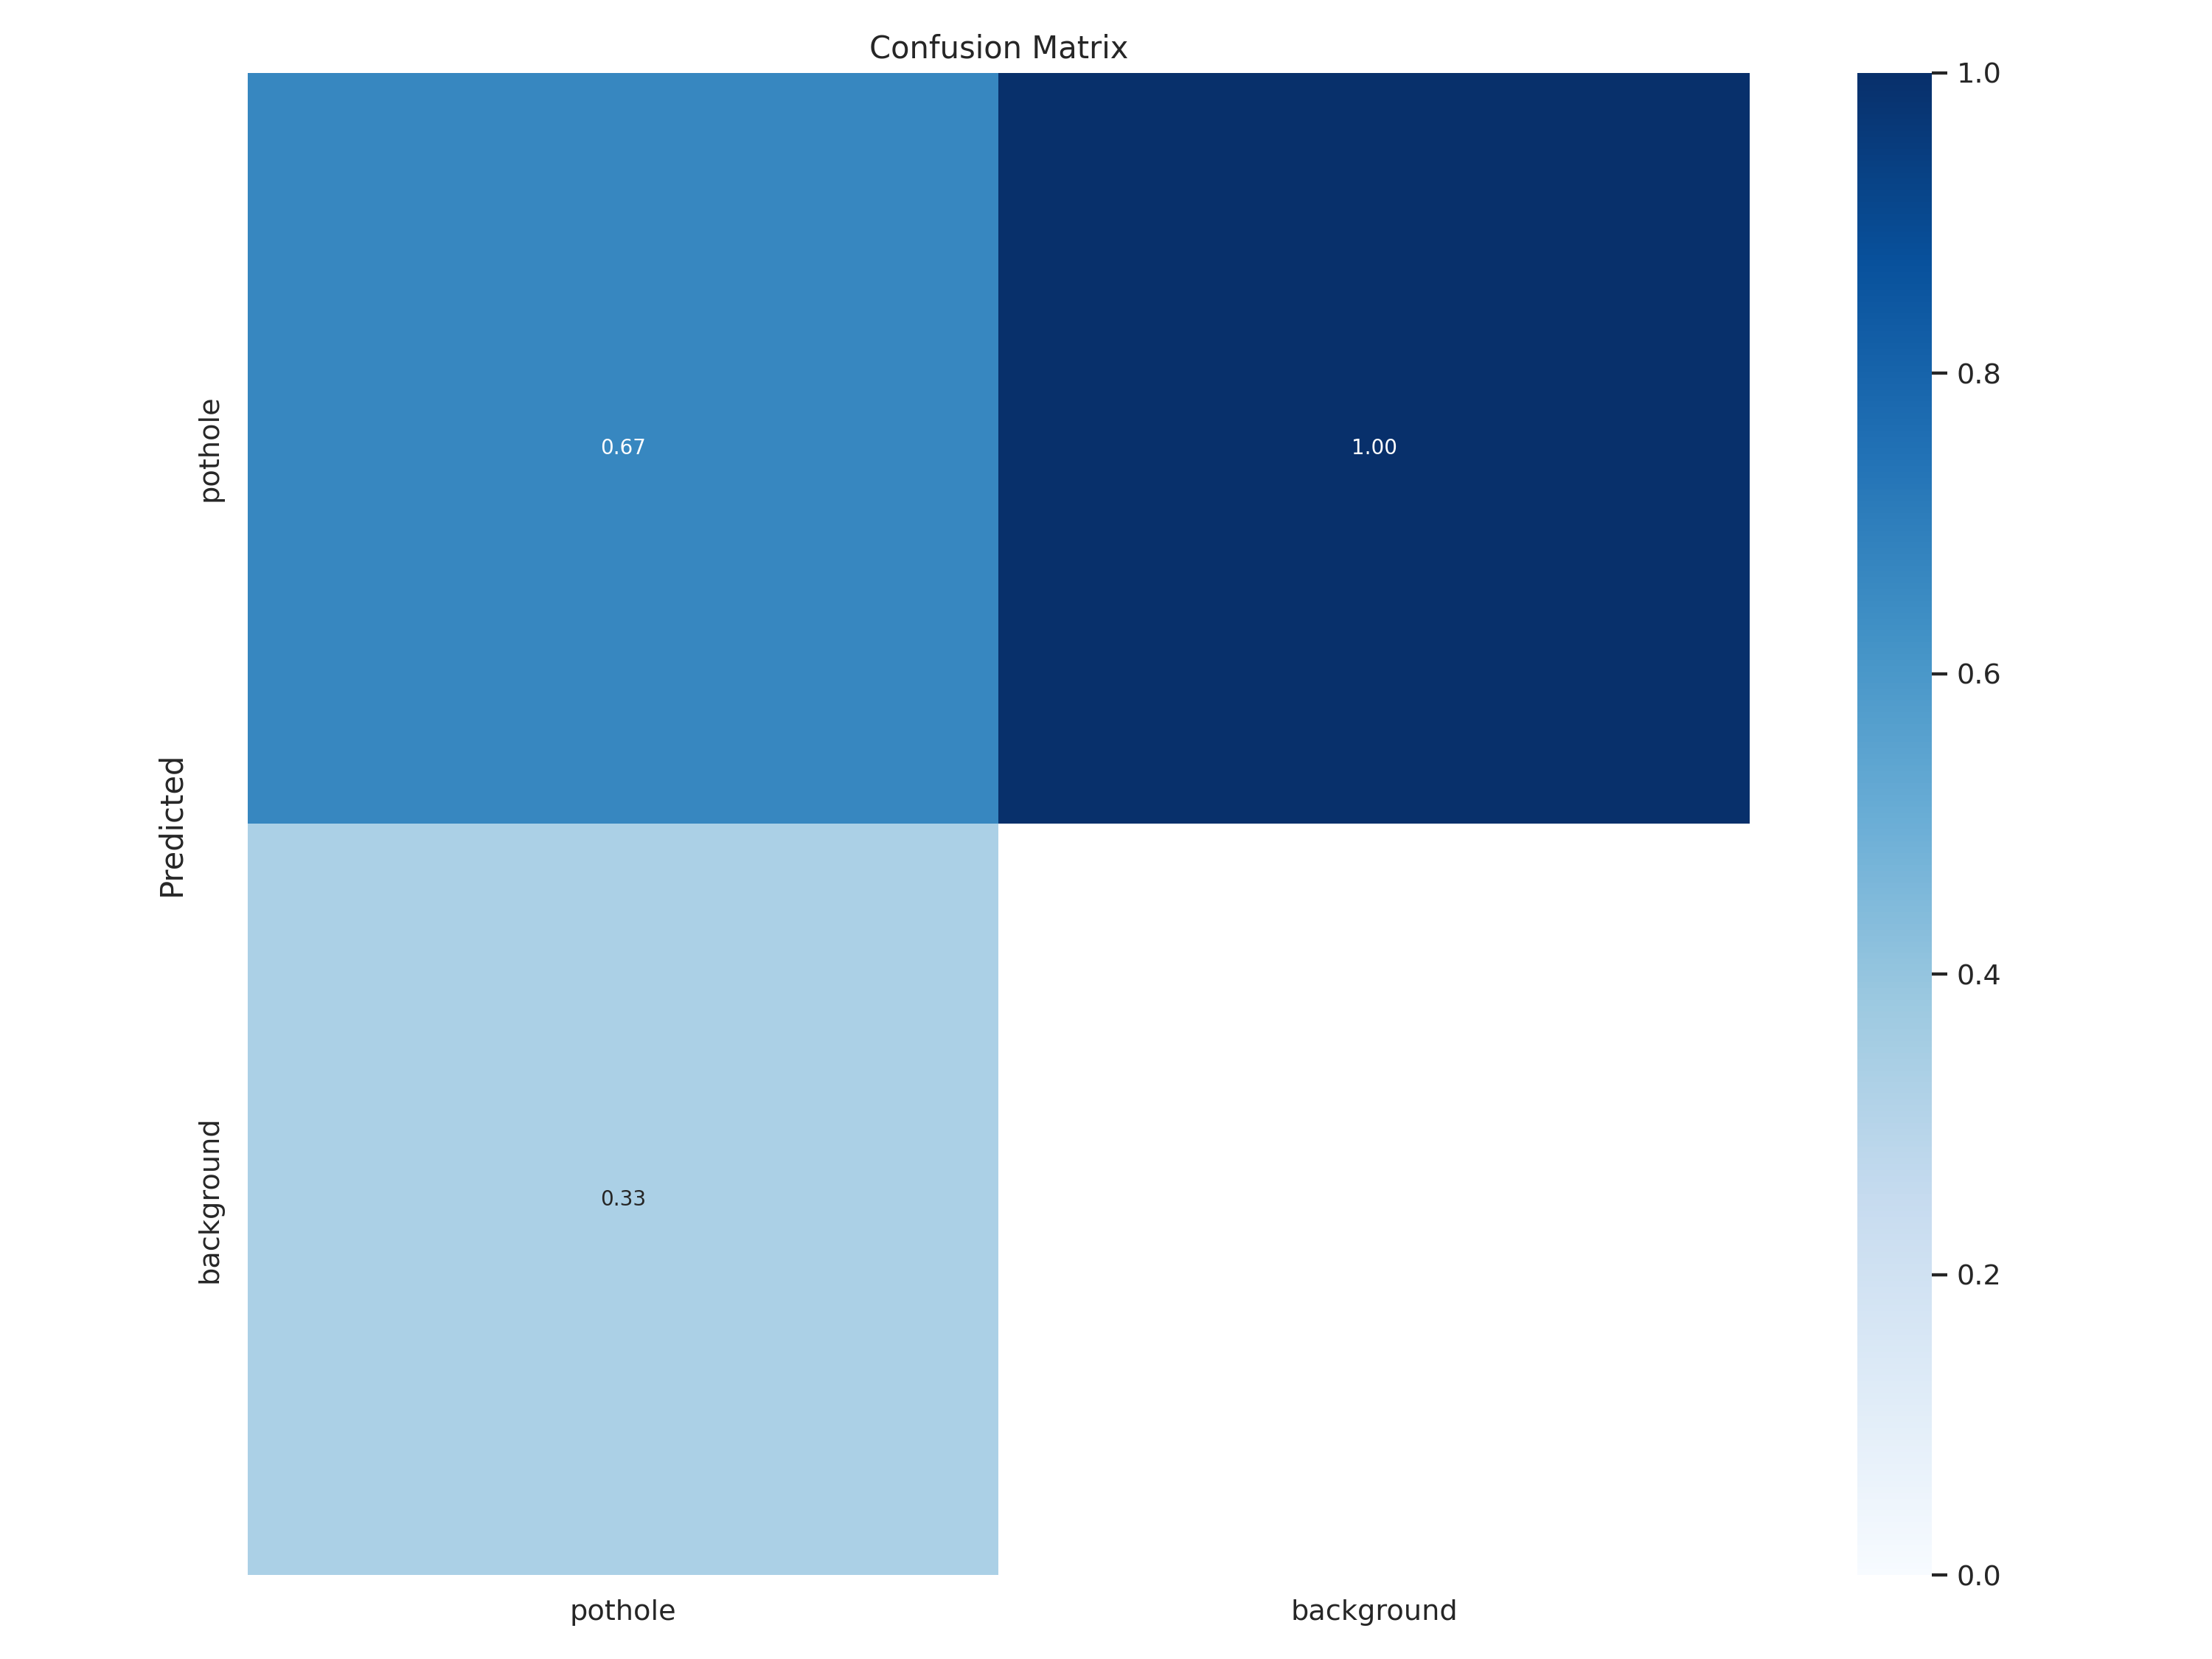

In [26]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


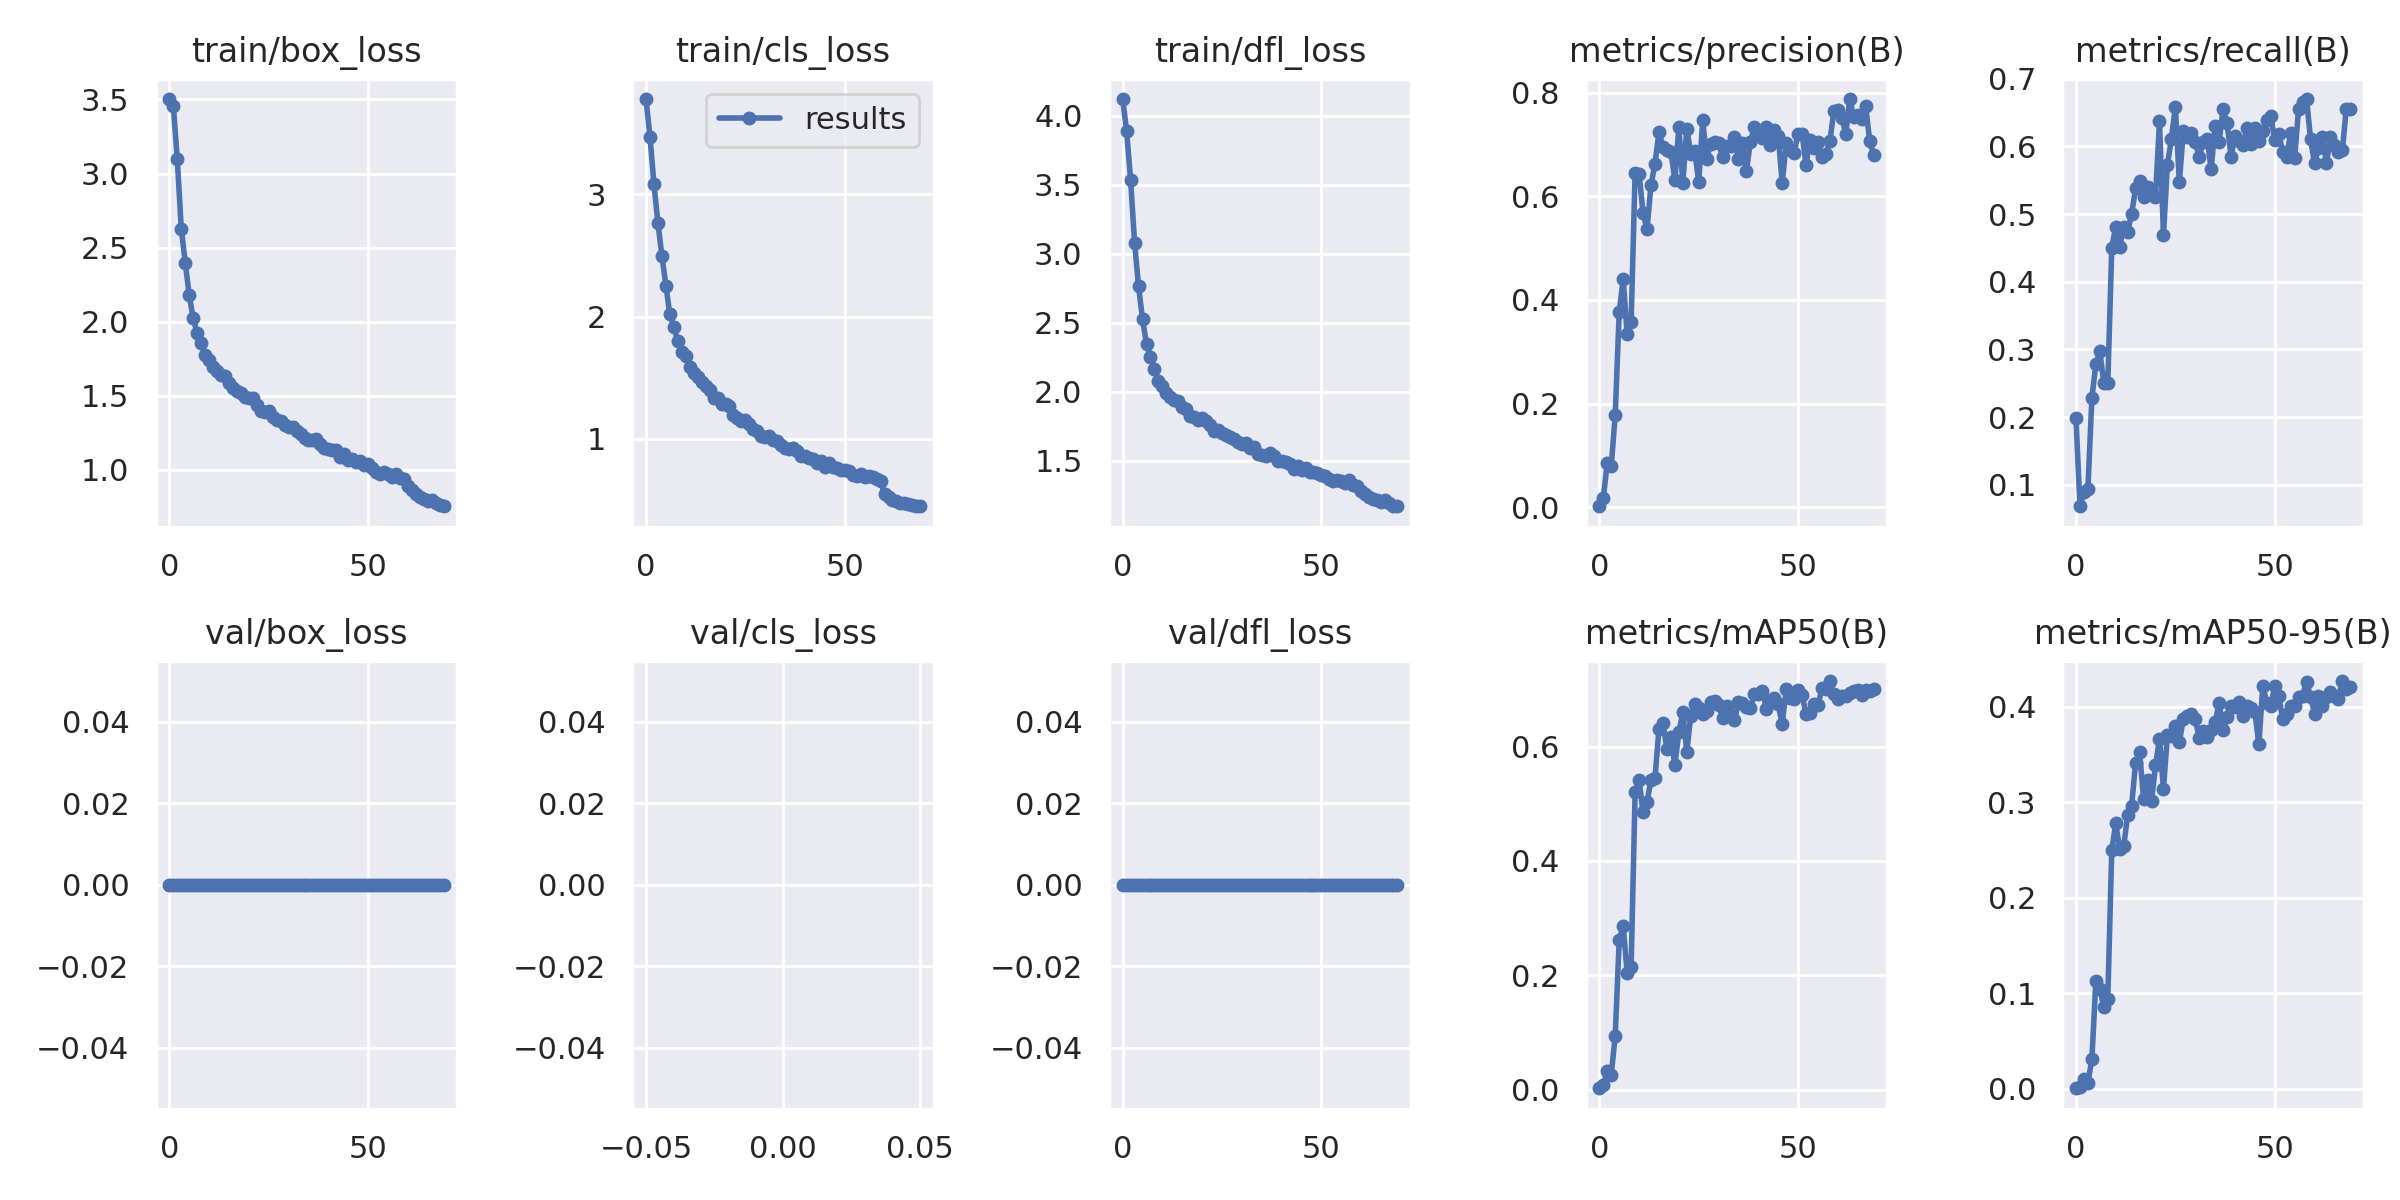

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


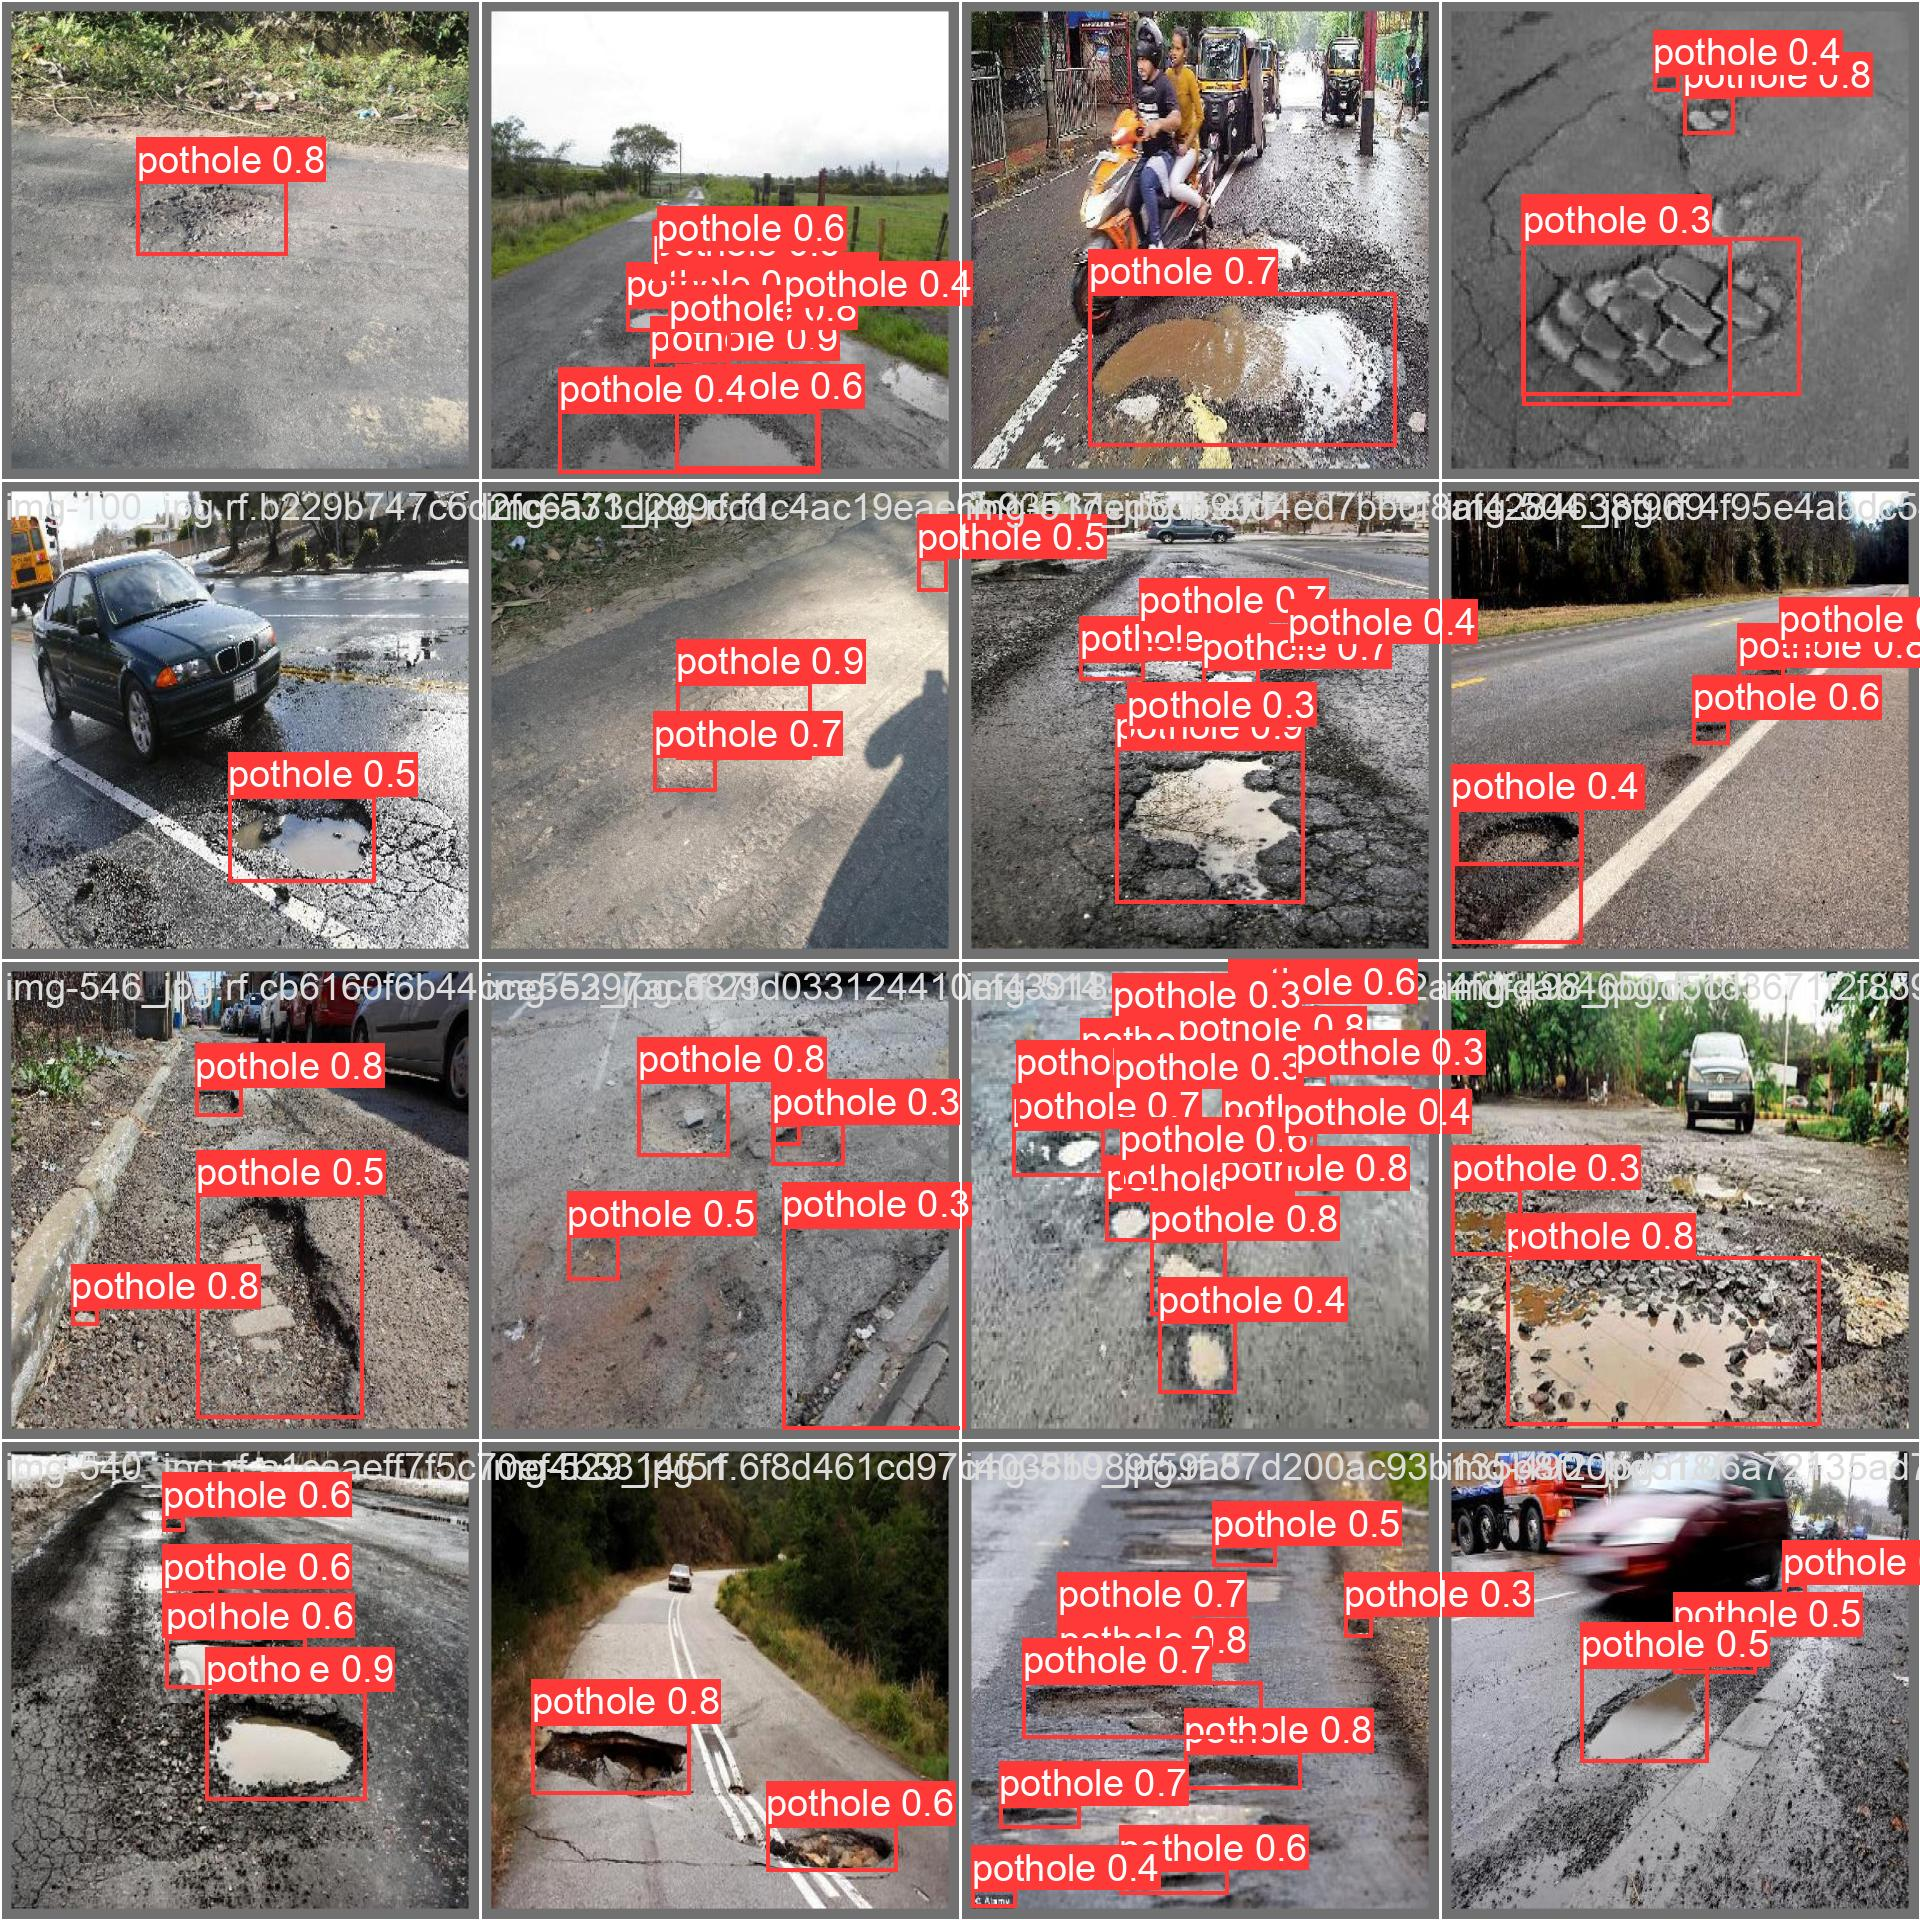

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [27]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=/content/datasets/potholes-detection-yolonas-5/data.yaml

/content
2023-08-30 14:47:59.435910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 14:48:00.370120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/potholes-detection-yolonas-5/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100% 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:08<00:00,  1.07it/s]
                   all        135        424      0.706       0.67      0.715      0.427
Speed:

#**Inference with Custom Model**

In [28]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/datasets/potholes-detection-yolonas-5/test/images

/content
2023-08-30 14:48:33.425152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 14:48:34.392021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/67 /content/datasets/potholes-detection-yolonas-5/test/images/img-113_jpg.rf.46d2fd7e9cde20708bd71397f29511ce.jpg: 640x640 1 pothole, 37.0ms
image 2/67 /content/datasets/potholes-detection-yolonas-5/test/images/img-125_jpg.rf.96421b2b7b87aa6b9fae26a08bd32061.jpg: 640x640 2 potholes, 34.7ms
image 3/67 /content/datasets/potholes-detection-yolonas-5/test/images/i

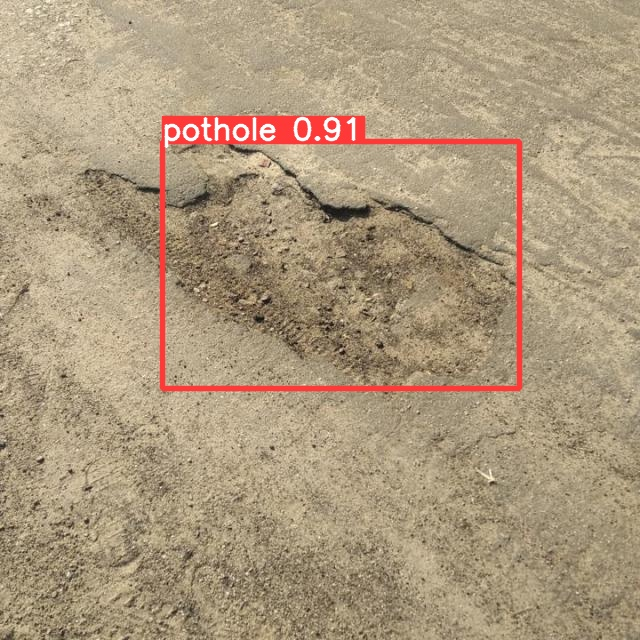

In [ ]:
Image("/content/runs/detect/predict2/img-113_jpg.rf.46d2fd7e9cde20708bd71397f29511ce.jpg")

#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 163MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2023-08-22 20:31:31.983111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 20:31:33.004544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 3 potholes, 74.6ms
video 1/1 (2/324) /content/demo.mp4: 384x640 3 potholes, 25.9ms
video 1/1 (3/324) /content/demo.mp4: 384x640 4 potholes, 25.8ms
video 1/1 (4/324) /content/demo.mp4: 384x640 4 potholes, 25.8ms
video 1/1 (5/324) /content/demo.mp4: 384x640 3 potholes, 25.8ms
video 1/1 (6/324) /content/demo.mp4: 384x640 3 potholes, 2

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)